In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import json
soup = BeautifulSoup(open(r"mkbhdreviews.html"), "html.parser")
from textblob import TextBlob

In [96]:
all_scripts = soup.find_all('script')
#The 25th script contains the json we're interested in
text = str(all_scripts[25])

In [97]:
res = text.partition('window["ytInitialData"] = ')[2] 
res = res.replace(';\n    window["ytInitialPlayerResponse"] = null;\n    if (window.ytcsi) {window.ytcsi.tick("pdr", null, \'\');}\n  </script>','')

In [98]:
dataJson = json.loads(res)
VideoRenderer = dataJson['contents']['twoColumnBrowseResultsRenderer']['tabs'][0]['tabRenderer']['content']['sectionListRenderer']['contents'][0]['itemSectionRenderer']['contents'][0]['playlistVideoListRenderer']['contents']

In [99]:
videosList = []
for videoRender in VideoRenderer:
    video = {}
    video['videoId'] = str(videoRender['playlistVideoRenderer']['videoId'])
    video['title'] = videoRender['playlistVideoRenderer']['title']['runs'][0]['text']
    video['length'] = videoRender['playlistVideoRenderer']['lengthText']['simpleText']
    videosList.append(video)

In [100]:
df = pd.DataFrame(videosList)

In [101]:
df

,videoId,title,length
0,s8Un0XB_8xk,OnePlus 2 Review!,13:59
1,LObJOc5u7sY,Jaybird X2 Review: Best Bluetooth Earbuds!,4:21
2,9HDKRP4nzc0,Moto G 2015 Review!,5:32
3,cx20nTPZjes,Sony RX100 IV Review: Pocket 4K!,7:10
4,xpc07Lbgrow,GoPro Hero 4 Session Review!,6:35
...,...,...,...
187,2IIUHleexIk,Moto 360 V2 Review!,3:57
188,E357cGzOGLM,iPhone 6s Review!,10:06
189,gM_gTtll7FE,Moto X Pure (2015) Review!,7:58
190,V-nBAcr_huw,Samsung Galaxy Note 5 Review!,9:08


In [2]:
from youtube_transcript_api import YouTubeTranscriptApi

In [3]:
YouTubeTranscriptApi.get_transcript('XDamqi_3Aro')

[{'text': '[Music]', 'start': 0.36, 'duration': 3.64},
 {'text': "hey what's up", 'start': 3.36, 'duration': 3.439},
 {'text': 'mkbhd here first of all welcome to', 'start': 4.0, 'duration': 4.0},
 {'text': 'techtober', 'start': 6.799, 'duration': 3.92},
 {'text': "and i've been wearing this red apple",
  'start': 8.0,
  'duration': 4.08},
 {'text': 'watch series 6', 'start': 10.719, 'duration': 3.201},
 {'text': 'every day since the impressions video',
  'start': 12.08,
  'duration': 4.0},
 {'text': "now so been living with it i've worked",
  'start': 13.92,
  'duration': 4.16},
 {'text': "out with it i've slept with it on",
  'start': 16.08,
  'duration': 3.84},
 {'text': 'pretty much everything so this is the',
  'start': 18.08,
  'duration': 2.959},
 {'text': "full review oh by the way if you're",
  'start': 19.92,
  'duration': 1.92},
 {'text': 'wondering like hey', 'start': 21.039, 'duration': 2.721},
 {'text': 'what about the video about this other',
  'start': 21.84,
  'duratio

In [103]:
videoid_list = [i['videoId'] for i in videosList]

In [104]:
text_dict = {}
for i in videoid_list:
    try:
        transcript_list1 = YouTubeTranscriptApi.get_transcript(i)
    except Exception as e:
        print(e)
    newtranscript_list = [i['text'] for i in transcript_list1]
    vid_transcript = ' '.join(newtranscript_list)
    text_dict[i] = vid_transcript


Could not retrieve a transcript for the video https://www.youtube.com/watch?v=3GrIWdORHvc! This is most likely caused by:

No transcripts were found for any of the requested language codes: ('en',)

For this video (3GrIWdORHvc) transcripts are available in the following languages:

(MANUALLY CREATED)
None

(GENERATED)
 - ko ("Korean (auto-generated)")[TRANSLATABLE]

(TRANSLATION LANGUAGES)
 - af ("Afrikaans")
 - sq ("Albanian")
 - am ("Amharic")
 - ar ("Arabic")
 - hy ("Armenian")
 - az ("Azerbaijani")
 - bn ("Bangla")
 - eu ("Basque")
 - be ("Belarusian")
 - bs ("Bosnian")
 - bg ("Bulgarian")
 - my ("Burmese")
 - ca ("Catalan")
 - ceb ("Cebuano")
 - zh-Hans ("Chinese (Simplified)")
 - zh-Hant ("Chinese (Traditional)")
 - co ("Corsican")
 - hr ("Croatian")
 - cs ("Czech")
 - da ("Danish")
 - nl ("Dutch")
 - en ("English")
 - eo ("Esperanto")
 - et ("Estonian")
 - fil ("Filipino")
 - fi ("Finnish")
 - fr ("French")
 - gl ("Galician")
 - ka ("Georgian")
 - de ("German")
 - el ("Greek")



Could not retrieve a transcript for the video https://www.youtube.com/watch?v=1cpUwbr5YyE! This is most likely caused by:

Subtitles are disabled for this video

If you are sure that the described cause is not responsible for this error and that a transcript should be retrievable, please create an issue at https://github.com/jdepoix/youtube-transcript-api/issues. Please add which version of youtube_transcript_api you are using and provide the information needed to replicate the error. Also make sure that there are no open issues which already describe your problem!

Could not retrieve a transcript for the video https://www.youtube.com/watch?v=LR708uA4zQ8! This is most likely caused by:

Subtitles are disabled for this video

If you are sure that the described cause is not responsible for this error and that a transcript should be retrievable, please create an issue at https://github.com/jdepoix/youtube-transcript-api/issues. Please add which version of youtube_transcript_api you are u

In [105]:
for i in text_dict:
    text_dict[i] == text_dict[i].replace('[Music]','')

In [106]:
df2 = pd.DataFrame(text_dict.items(), columns=['videoId', 'text'])

In [107]:
df2.head()

,videoId,text
0,s8Un0XB_8xk,hey what is up guys um could be HD here and th...
1,LObJOc5u7sY,hey what's up guys I'm Kim PhD here and these ...
2,9HDKRP4nzc0,hey what is up guys in qHD here alright we hav...
3,cx20nTPZjes,hey what is up guys I'm could be HD here and t...
4,xpc07Lbgrow,hey what is up guys I'm Kim PhD here and every...


In [108]:
df_final = merge_attempt = pd.merge(df, df2, on='videoId', how='left')

In [109]:
df_final

,videoId,title,length,text
0,s8Un0XB_8xk,OnePlus 2 Review!,13:59,hey what is up guys um could be HD here and th...
1,LObJOc5u7sY,Jaybird X2 Review: Best Bluetooth Earbuds!,4:21,hey what's up guys I'm Kim PhD here and these ...
2,9HDKRP4nzc0,Moto G 2015 Review!,5:32,hey what is up guys in qHD here alright we hav...
3,cx20nTPZjes,Sony RX100 IV Review: Pocket 4K!,7:10,hey what is up guys I'm could be HD here and t...
4,xpc07Lbgrow,GoPro Hero 4 Session Review!,6:35,hey what is up guys I'm Kim PhD here and every...
...,...,...,...,...
187,2IIUHleexIk,Moto 360 V2 Review!,3:57,hey so I was just getting some work done the o...
188,E357cGzOGLM,iPhone 6s Review!,10:06,[Music] hey what's up guys I'm Kim PhD here an...
189,gM_gTtll7FE,Moto X Pure (2015) Review!,7:58,hey what is up guys I'm Kim PhD here and this ...
190,V-nBAcr_huw,Samsung Galaxy Note 5 Review!,9:08,[Music] hey what is up guys I'm qHD here and t...


In [110]:
df_final.replace('\[Music\]', ' ', regex=True, inplace = True)

# Adding Punctuations

In [111]:
import requests

url = "http://bark.phon.ioc.ee/punctuator"
headers = {
  'Content-Type': 'application/x-www-form-urlencoded'
}

for i, row in df_final.iterrows():
    payload = 'text='+df_final.iloc[i]['text']
    response = requests.request("POST", url, headers=headers, data = payload)
    df_final.at[i,'text'] = response.text.encode('utf8')

In [113]:
df_final.to_csv('mkbhd_corpus.csv', index = False)

## Start from here - read corpus

In [7]:
df = pd.read_csv('mkbhd_corpus.csv')

In [8]:
df.head(5)

,videoId,title,length,text
0,s8Un0XB_8xk,OnePlus 2 Review!,13:59,"Hey, what is up guys? Um could be HD here, and..."
1,LObJOc5u7sY,Jaybird X2 Review: Best Bluetooth Earbuds!,4:21,"Hey, what's up guys, I'm Kim PhD here, and the..."
2,9HDKRP4nzc0,Moto G 2015 Review!,5:32,"Hey what is up guys in qHD here? Alright, we h..."
3,cx20nTPZjes,Sony RX100 IV Review: Pocket 4K!,7:10,"Hey what is up guys? I'M could be HD here, and..."
4,xpc07Lbgrow,GoPro Hero 4 Session Review!,6:35,"Hey what is up guys, I'm Kim PhD here and ever..."


In [6]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.corpus import inaugural
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation

In [173]:
def cleanAndPreProcess(speech):
    for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t¦¡§':
        speech = speech.replace(char, ' ')
    speech = speech.lower()
    word_list = speech.split()
    word_list = [w for w in word_list if w not in stop_words]
    return word_list

In [174]:
#Creating count of words in the speech
def PresidentVocabCheck(word_list):
    dict = {}                            # Initialize dictionary to create a word count
    for w in word_list:
        dict[w] = dict.get(w, 0) + 1
    return dict 

In [175]:
def CalculateVocab(df):
    presVoc = pd.DataFrame()
    vocab_list = []
    for i, j in df.iterrows():
        speech = {}
        speech['videoId'] = df.iloc[i]['videoId']
        speech['title'] = df.iloc[i]['title']
        speech['words'] = len(PresidentVocabCheck(cleanAndPreProcess(df.iloc[i]['text']))) #Remove Len to get words
        speech['length'] = df.iloc[i]['length']
        vocab_list.append(speech)
    presVoc = pd.DataFrame(vocab_list)
    return presVoc

In [176]:
vocab = CalculateVocab(df)

In [185]:
highwords = vocab.sort_values(by='words', ascending=False).head(20)

<AxesSubplot:xlabel='words', ylabel='title'>

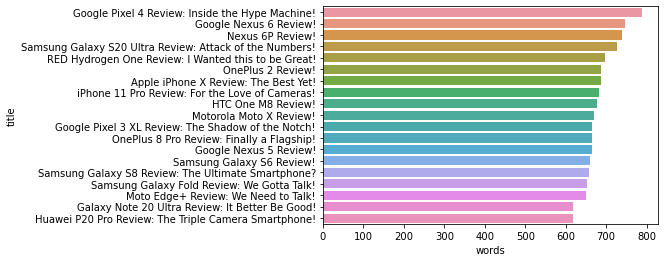

In [187]:
sns.barplot(x="words", y="title", data=highwords, dodge=False)

In [192]:
def wordCount(tweetstring):
    words = tweetstring.split()
    words = [w for w in words if w not in stop_words and len(w) > 2]
    words = [w for w in words if w not in ['amp', 'u']]
    words = [w for w in words if w.isalpha()]
    #return words

    # Get count of words
    freqdist = nltk.FreqDist(words)
    return freqdist

In [193]:
tweetstring = ''
for i in df.index:
    tweetstring = tweetstring + ' ' + df.loc[i, 'text']
freqdist = wordCount(tweetstring)

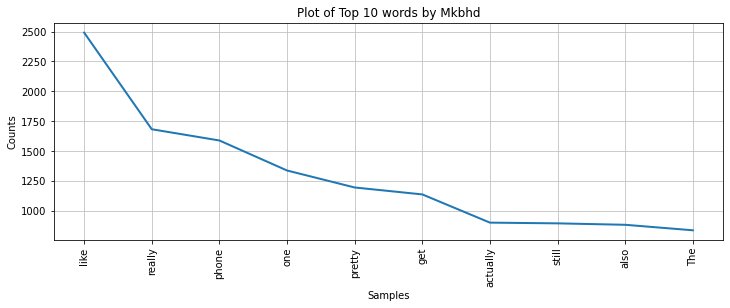

<AxesSubplot:title={'center':'Plot of Top 10 words by Mkbhd'}, xlabel='Samples', ylabel='Counts'>

In [194]:
import matplotlib.pyplot as plot
plt.figure(figsize=(12,4))
freqdist.plot(10, cumulative=False, title='Plot of Top 10 words by Mkbhd')

In [200]:
#word_list = text.split()
#word_list = [w for w in word_list if w not in stop_words and len(w) > 2]
#words = [lemmatizer.lemmatize(w) for w in word_list]
    #words = [ps.stem(w) for w in words]
#text = ' '.join(words)
blob_object = TextBlob(tweetstring)
    
word_list_nouns = [word for word,pos in blob_object.tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
text = ' '.join(word_list_nouns)
text

"Hey guys Um HD company phone name device part month weeks driver time lot people get flagship killer slogan hype look device place hardware lot decisions hardware department phone hand weight side scale smartphones nothing smartphone inch display metal band phone improvement band phone feel thin manufacturers nothing dear smartphone manufacturer camera module rest phone body battery phone everyone Extra battery thank shape sort boxy way hand phone sandstone default sandstone texture Unique bit year phone durability back back material drop look feel back access SIM card slot trays access battery storage SIM card slots one switch hand side slider profiles phone screen way notifications way priority Notifications way mode switch way way order settings course slider left power volume buttons hand side phone bit ridges anything kind power button They'Re tactile buttons week phone making mistakes power button try time option tap screen sleep top phone headphone jack kind bottom bottom phone

In [201]:
freqdistNoun = wordCount(text)

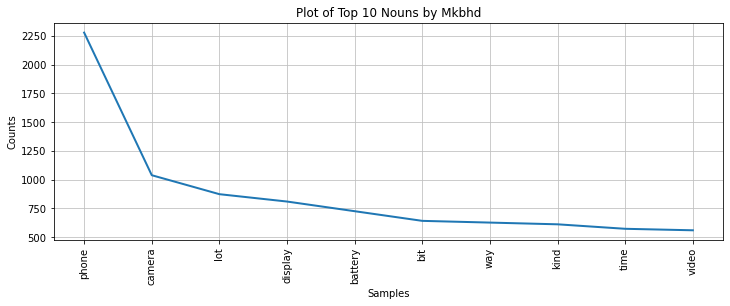

<AxesSubplot:title={'center':'Plot of Top 10 Nouns by Mkbhd'}, xlabel='Samples', ylabel='Counts'>

In [203]:
plt.figure(figsize=(12,4))
freqdistNoun.plot(10, cumulative=False, title='Plot of Top 10 Nouns by Mkbhd')

In [270]:
#Function to calculate the polarity/sentiment of every text
wordlist = []
for i in df.index:
    for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t':
        speech = df.loc[i, 'text'].replace(char, ' ')
        speech = speech.lower()
    wordlist.append(speech)
def SentimentAnalyzer():
    analyzer = SentimentIntensityAnalyzer()
    sentiment = {}
    polarity = [0]*len(wordlist)

    for i, word in enumerate(wordlist):
        word = word.strip(punctuation).lower()   #Strip punctuation and lower the words
        sentiment[i] = analyzer.polarity_scores(word)  #Analyse sentiment for every tweet
        polarity[i] = sentiment[i]['compound']
  
    df['polarity'] = polarity    #Add to Polarity column
SentimentAnalyzer()

<AxesSubplot:xlabel='polarity', ylabel='Count'>

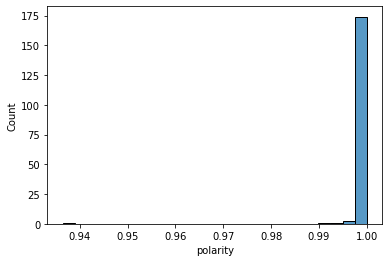

In [271]:
sns.histplot(df['polarity'], bins = 25)

In [272]:
df.sort_values(by=['polarity'], ascending=True)

,videoId,title,length,text,polarity
66,yRaIjn6q9Jo,LG Optimus G Review! (Nexus 4 Comparison),4:07,Hey what's up guys mkbhd here tomorrow is Nexu...,0.9364
39,tTxhneVcmEo,Samsung Galaxy Round Review!,6:34,"Hey what is up guys, I'm Kay Bhd here and firs...",0.9910
81,ngEoQzIqHMc,Chrome Beta for Android!,4:26,"Hey, what's up guys mkbhd here and welcome to ...",0.9928
177,V-nBAcr_huw,Samsung Galaxy Note 5 Review!,9:08,"Hey, what is up guys, I'm qHD here - and this ...",0.9967
75,fDCumhEKerw,TokyoFlash Night Vision Watch!,2:47,Hey what's up guys mkbhd here in the last vide...,0.9967
...,...,...,...,...,...
19,RoAPTdvgAJg,Google Nexus 6 Review!,17:02,"Hey, what's up guys, I'm Kim PhD here, and it'...",1.0000
117,DyX-QZZBgpw,iPhone 11 Pro Review: For the Love of Cameras!,15:43,Welcome to the review of the iPhone 11 Pro rig...,1.0000
35,pwsPZi_JRrA,HTC One M8 Review!,15:38,"Hey, what is up guys, I'm KB HD here - and thi...",1.0000
173,Xc5fFvp8le4,Nexus 6P Review!,13:29,"Hey what is up guys, i'm kim Bhd here - and th...",1.0000


In [132]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [275]:
df2 = df
for i in df2.index:
    #df2.at[i,'text'] = ' '.join(df2.loc[i,'text'])
    df2.at[i,'text'] = ' '.join(cleanAndPreProcess(df2.iloc[i]['text']))

,videoId,title,length,text,polarity
0,s8Un0XB_8xk,OnePlus 2 Review!,13:59,hey guys um could hd oneplus 2 company named o...,0.9999
1,LObJOc5u7sY,Jaybird X2 Review: Best Bluetooth Earbuds!,4:21,hey guys kim phd j bird 2 bluetooth earbuds se...,0.9998
2,9HDKRP4nzc0,Moto G 2015 Review!,5:32,hey guys qhd alright pretty great smartphones ...,0.9995
3,cx20nTPZjes,Sony RX100 IV Review: Pocket 4K!,7:10,hey guys could hd sequel best pocket camera ev...,0.9995
4,xpc07Lbgrow,GoPro Hero 4 Session Review!,6:35,hey guys kim phd every single gopro first one ...,0.9997
...,...,...,...,...,...
174,2IIUHleexIk,Moto 360 V2 Review!,3:57,hey getting work done day wearing moto 360 day...,0.9993
175,E357cGzOGLM,iPhone 6s Review!,10:06,hey guys kim phd iphone 6s know might little b...,0.9998
176,gM_gTtll7FE,Moto X Pure (2015) Review!,7:58,hey guys kim phd 2015 moto pure addition moto ...,0.9999
177,V-nBAcr_huw,Samsung Galaxy Note 5 Review!,9:08,hey guys qhd galaxy note 5 latest greatest big...,0.9967


In [284]:
vec = TfidfVectorizer()
vec = TfidfVectorizer(stop_words='english')
vec = TfidfVectorizer(stop_words='english', max_df = 0.70, min_df =5)
tfidf = vec.fit_transform(df2['text'])

In [288]:
model = LDA(n_components=3, random_state = 42)
lda_fit = model.fit(tfidf)
terms = vec.get_feature_names()
topicList = []
for i, comp in enumerate(model.components_):
    #print(f"The topic would be {id_value}")
    lis = [terms[index] for index in comp.argsort()[-5:]]
    #print(lis)
    topicList.append(lis)
results = model.transform(tfidf)

In [289]:
topicList

[['covering', 'optimus', 'locked', 'marquez', 'textured'],
 ['covering', 'optimus', 'locked', 'marquez', 'textured'],
 ['phones', 'google', 'android', 'galaxy', 'iphone']]

In [297]:
df

,videoId,title,length,text,polarity
0,s8Un0XB_8xk,OnePlus 2 Review!,13:59,hey guys um could hd oneplus 2 company named o...,0.9999
1,LObJOc5u7sY,Jaybird X2 Review: Best Bluetooth Earbuds!,4:21,hey guys kim phd j bird 2 bluetooth earbuds se...,0.9998
2,9HDKRP4nzc0,Moto G 2015 Review!,5:32,hey guys qhd alright pretty great smartphones ...,0.9995
3,cx20nTPZjes,Sony RX100 IV Review: Pocket 4K!,7:10,hey guys could hd sequel best pocket camera ev...,0.9995
4,xpc07Lbgrow,GoPro Hero 4 Session Review!,6:35,hey guys kim phd every single gopro first one ...,0.9997
...,...,...,...,...,...
174,2IIUHleexIk,Moto 360 V2 Review!,3:57,hey getting work done day wearing moto 360 day...,0.9993
175,E357cGzOGLM,iPhone 6s Review!,10:06,hey guys kim phd iphone 6s know might little b...,0.9998
176,gM_gTtll7FE,Moto X Pure (2015) Review!,7:58,hey guys kim phd 2015 moto pure addition moto ...,0.9999
177,V-nBAcr_huw,Samsung Galaxy Note 5 Review!,9:08,hey guys qhd galaxy note 5 latest greatest big...,0.9967


In [313]:
sentence_list = nltk.sent_tokenize(df.iloc[5]['text'])

In [8]:
import spacy

In [9]:
nlp = spacy.load("en_core_web_sm")
#doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for i,rows in df.iterrows():
    doc = nlp(df.loc[i,'text'])
    for token in doc:
        if(token.pos_ == 'PROPN'):
            print(token.text, token.pos_, token.dep_)

flagship PROPN compound
Unique PROPN acomp
SIM PROPN compound
SIM PROPN compound
They'Re PROPN ROOT
Grill PROPN pobj
MacBook PROPN nmod
Chromebook PROPN conj
I'M PROPN nsubj
ID PROPN pobj
Galaxy PROPN compound
AMOLED PROPN compound
HD PROPN conj
galaxy PROPN compound
s6 PROPN pobj
SIM PROPN compound
megapixel PROPN amod
autofocus PROPN compound
laser PROPN compound
autofocus PROPN pobj
milliamp PROPN compound
Wireless PROPN compound
NFC PROPN conj
EQ PROPN dobj
NFC PROPN nsubj
NFC PROPN dobj
Google PROPN compound
Wallet PROPN conj
NFC PROPN dobj
Wi PROPN compound
Fi PROPN nsubj
NFC PROPN pobj
omni PROPN compound
open PROPN amod
I'Ve PROPN nsubjpass
Samsung PROPN compound
OS PROPN conj
Android PROPN pobj
SIM PROPN compound
SIM PROPN compound
SIM PROPN compound
DoubleTap PROPN nsubj
middle PROPN compound
home PROPN compound
Google PROPN compound
They'Ve PROPN nsubj
Android PROPN pobj
I'M PROPN nsubj
Os PROPN nsubj
Snapdragon PROPN nmod
Android PROPN compound
Snapdragon PROPN pobj
I'M PRO

Kim PROPN compound
Chromebook PROPN compound
Chromebook PROPN compound
LS PROPN nsubj
Chromebook PROPN pobj
Google PROPN compound
Chrome PROPN pobj
OS PROPN pobj
Chromebook PROPN compound
iPad PROPN nsubj
Chromebook PROPN compound
USBC PROPN compound
Windows PROPN nmod
Mac PROPN conj
Chrome PROPN compound
OS PROPN npadvmod
LED PROPN compound
USBC PROPN compound
Chromebook PROPN compound
720p PROPN compound
Chrome PROPN compound
Web PROPN compound
Store PROPN pobj
Chrome PROPN compound
Web PROPN compound
Store PROPN nsubj
Android PROPN pobj
Chrome PROPN compound
OS PROPN pobj
Windows PROPN compound
Wi PROPN compound
Fi PROPN nsubj
LTE PROPN pobj
Chromebook PROPN compound
MTV PROPN pobj
HD PROPN npadvmod
Galaxy PROPN compound
S PROPN conj
Samsung PROPN poss
Samsung PROPN compound
Galaxy PROPN compound
Galaxy PROPN compound
S. PROPN npadvmod
Exynos PROPN nmod
Mallee PROPN appos
GPU PROPN conj
Galaxy PROPN compound
S PROPN attr
microSD PROPN compound
galaxy PROPN compound
s5 PROPN pobj
Nex

Kim PROPN compound
iPad PROPN compound
iPad PROPN compound
iPad PROPN compound
iPad PROPN compound
iPad PROPN attr
iPad PROPN compound
iPad PROPN compound
iPad PROPN pobj
iPhone PROPN conj
Apple PROPN pobj
iPad PROPN pobj
iPad PROPN nmod
iPad PROPN compound
Retina PROPN compound
iPad PROPN pobj
Retina PROPN compound
iPad PROPN compound
Ausa PROPN nmod
iPad PROPN compound
iPad PROPN pobj
Apple PROPN poss
a8x PROPN compound
Apple PROPN compound
a8x PROPN nsubj
I'Ve PROPN nsubj
iPad PROPN pobj
Apple PROPN nsubj
iPad PROPN compound
iPad PROPN compound
iPhone PROPN compound
5s PROPN pobj
Apple PROPN pobj
iPad PROPN nsubj
f-15s PROPN nsubj
iPad PROPN nsubj
ID PROPN dobj
NFC PROPN attr
Apple PROPN compound
iOS PROPN pobj
ID PROPN pobj
Apple PROPN compound
Catcher PROPN nsubj
iPad PROPN pobj
iPad PROPN dobj
Nexus PROPN pobj
iPad PROPN compound
Mini PROPN conj
iPad PROPN compound
Mini PROPN pobj
iPad PROPN compound
Mini PROPN appos
iPad PROPN compound
Mini PROPN pobj
Retina PROPN compound
ID PR

HD PROPN attr
Sony PROPN compound
Mark PROPN attr
rx100 PROPN compound
KB PROPN compound
HD PROPN attr
EVF PROPN nsubj
eyepiece PROPN dobj
Sony PROPN nsubj
EVF PROPN attr
Sony PROPN pobj
Carl PROPN compound
Zeiss PROPN compound
F PROPN pobj
F PROPN pobj
Sony PROPN nsubj
Swiss PROPN amod
Army PROPN compound
Sony PROPN compound
NFC PROPN pobj
Sony PROPN npadvmod
PlayMemories PROPN nsubj
NFC PROPN pobj
Canon PROPN pobj
t5i PROPN amod
Sony PROPN compound
Carl PROPN compound
Zeiss PROPN compound
mark PROPN conj
codec PROPN conj
Instagram PROPN conj
Twitter PROPN conj
Google PROPN appos
Facebook PROPN appos
I'D PROPN nsubj
DSLRs PROPN pobj
I'Ve PROPN nsubj
Fuji PROPN pobj
x100s PROPN appos
SLR PROPN pobj
youtuber PROPN compound
YouTube PROPN nmod
grab PROPN xcomp
mark PROPN dobj
Mark PROPN conj
YouTube PROPN compound
I'Ll PROPN nsubj
Black PROPN compound
Friday PROPN pobj
Kay PROPN compound
Android PROPN compound
LG PROPN pobj
g3 PROPN attr
LG PROPN compound
g2 PROPN pobj
galaxy PROPN compou

KB PROPN compound
HD PROPN attr
Mac PROPN compound
Pro PROPN ROOT
Apple PROPN pobj
Apple PROPN nsubj
iPhones PROPN conj
Apple PROPN pobj
Mac PROPN compound
Pro PROPN dobj
Mac PROPN compound
Pro PROPN compound
Mac PROPN compound
Pro PROPN compound
Mac PROPN compound
Pro PROPN nsubj
Mac PROPN compound
Pro PROPN compound
Mac PROPN compound
Pro PROPN pobj
Mac PROPN compound
Pro PROPN nsubj
Apple PROPN nsubj
Apple PROPN dobj
Apple PROPN compound
Mac PROPN compound
Pro PROPN pobj
Xeon PROPN compound
Mac PROPN compound
Pro PROPN pobj
Adobe PROPN compound
Premiere PROPN pobj
Effects PROPN pobj
YouTube PROPN compound
Adobe PROPN compound
Flash PROPN nsubj
mac PROPN compound
mac PROPN compound
OS PROPN nmod
I'Ve PROPN nsubj
Adobe PROPN compound
Premiere PROPN dobj
Effects PROPN pobj
Mac PROPN compound
Pro PROPN pobj
GPU PROPN appos
d700 PROPN compound
Adobe PROPN nsubj
Adobe PROPN pobj
Mac PROPN compound
Pro PROPN compound
Apple PROPN poss
Final PROPN compound
Cut PROPN compound
Mac PROPN pobj
A

KB PROPN compound
HD PROPN attr
Samsung PROPN compound
Galaxy PROPN compound
SmartWatch PROPN attr
Samsung PROPN pobj
SmartWatch PROPN compound
II PROPN nsubj
Samsung PROPN compound
Galaxy PROPN compound
Galaxy PROPN compound
Samsung PROPN nsubj
Samsung PROPN pobj
D PROPN compound
PPI PROPN compound
Galaxy PROPN compound
NFC PROPN compound
Galaxy PROPN compound
Clasp PROPN nsubj
galaxy PROPN compound
microphone PROPN compound
Android PROPN compound
Android PROPN npadvmod
Samsung PROPN poss
megahertz PROPN compound
Motorola PROPN compound
Droid PROPN pobj
Galaxy PROPN compound
Samsung PROPN compound
Mail PROPN pobj
Samsung PROPN compound
s PROPN attr
Samsung PROPN compound
MIDI PROPN compound
YouTube PROPN pobj
Spotify PROPN compound
SoundCloud PROPN appos
Calories PROPN nsubj
s PROPN nummod
Fitness PROPN pobj
Samsung PROPN nsubj
Bluetooth PROPN pobj
Samsung PROPN nsubj
Galaxy PROPN compound
Galaxy PROPN compound
Evernote PROPN pobj
Google PROPN compound
Play PROPN pobj
Galaxy PROPN com

KeyboardInterrupt: 

In [10]:
for i,rows in df.iterrows():
    doc = nlp(df.loc[i,'title'])
    possibleProduct = ''
    for token in doc:
        if(token.pos_ == 'PROPN' or token.pos_ == 'NOUN' or token.pos_ == 'NUM'):
            possibleProduct = possibleProduct + ' ' + token.text
            #print(token.text, token.pos_, token.dep_)
    df.loc[i,'Product'] = possibleProduct.replace('Review','')
    #print(possibleProduct.replace('Review',''))

In [11]:
df.head(10)

,videoId,title,length,text,Product
0,s8Un0XB_8xk,OnePlus 2 Review!,13:59,"Hey, what is up guys? Um could be HD here, and...",OnePlus 2
1,LObJOc5u7sY,Jaybird X2 Review: Best Bluetooth Earbuds!,4:21,"Hey, what's up guys, I'm Kim PhD here, and the...",Jaybird X2 Best Bluetooth Earbuds
2,9HDKRP4nzc0,Moto G 2015 Review!,5:32,"Hey what is up guys in qHD here? Alright, we h...",Moto G 2015
3,cx20nTPZjes,Sony RX100 IV Review: Pocket 4K!,7:10,"Hey what is up guys? I'M could be HD here, and...",Sony RX100 IV Pocket 4 K
4,xpc07Lbgrow,GoPro Hero 4 Session Review!,6:35,"Hey what is up guys, I'm Kim PhD here and ever...",GoPro Hero 4 Session
5,orPHNS-0CZI,iPod Touch 2015 Review!,4:53,I totally meant to do that hey what is up guys...,iPod Touch 2015
6,TA8JprZlDYA,2015 Macbook Review!,8:13,"Hey what is up guys, I'm qHD here - and this i...",2015 Macbook
7,UrzhzCA1NUw,HTC One M9+ (& S6 Plus!),4:10,"All right, so, if the HTC One m9 and the Samsu...",HTC One M9 S6 Plus
8,VTUDzrIgZlI,LG G4 Review!,11:29,Hey what is up guys in cabbie HD here and the ...,LG G4
9,dPL1-8ypnEs,Apple Watch Review!,7:10,"Okay, so this is the Apple watch. This is Appl...",Apple Watch


In [15]:
for i,rows in df.iterrows():
    possiblePrices = []
    doc = nlp(df.loc[i,'text'])
    for ent in doc.ents:
        if(ent.label_ == 'MONEY'):
            possiblePrices.append(ent.text)
    df.loc[i,'Prices'] = possiblePrices
        #print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [16]:
df['Prices'].head(15)

0                                            [800, 389]
1                           [200 bucks, 200, 150 bucks]
2     [400 bucks, 300 bucks, $ 179, 220, a little ov...
3     [rx100 mark, rx100 mark, a thousand dollar, a ...
4            [99, 400 bucks, 500 bucks, 400 bucks, 400]
5                                           [200 bucks]
6     [1,300 bucks, 80, 1,300 bucks, 1,300 bucks, 1,...
7                                                    []
8                                                    []
9                                      [700, 700 bucks]
10    [a hundred dollars, hundred bucks, the extra h...
11                                        [over $ 1000]
12                                                   []
13                                                   []
14                                                 [99]
Name: Prices, dtype: object

In [18]:
df.to_excel('reviewsproductsAndPrices.xlsx')

In [51]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

0     2 2 1 2 1 2 three 2 5.5 one one 2 one two one...
1     2 200 5 $ 200 three three 2 2015 2 three thre...
2     2 400 300 3 2 2015 two 179 $ 179 8 1 $ 220 16...
3     two 3 4 2 3 4 3 one 21 24 70 30 mm 960 one 4k...
4     one 2015 $ 99 one two one one two one one 50 ...
5     2-year 1 1 90 2015 4 11 36 640 326 6.1 88 two...
6     2015 one 35 135 2.03 two two one zero one 480...
7     One 4 One one 5.2 2560 1440 0.2 1080p one one...
8     2015 six 808 3 810 5.5 2 one 3000 5.5 5.1 fiv...
9     three three two 38 42 38 42 360 46 42 $ 700 7...
Name: Price, dtype: object

In [65]:
Organisations = []
for i,rows in df.iterrows():
    doc = nlp(df.loc[i,'text'])
    for ent in doc.ents:
        if(ent.label_ == 'ORG'):
            Organisations.append(ent.text)

In [ ]:
Organisations

In [90]:
from collections import Counter
d = Counter(Organisations)
orgdf = pd.DataFrame.from_dict(d, orient='index').reset_index()
orgdf.rename(columns={'index':'org', 0:'count'}, inplace=True)

In [116]:
orgdf[orgdf['count']>10].sort_values(by='count', ascending=True)

,org,count
269,samsung,11
296,Bionic,12
187,MacBook Air,13
147,the Galaxy Nexus,13
25,sony,13
281,pixel,14
80,Nvidia,14
43,HTC,16
48,gon,16
99,UI,17


In [119]:
orgdfTop10 = orgdf.sort_values(by='count', ascending=False).head(10)

<AxesSubplot:title={'center':'Most Organisations spoken in the reviews'}, xlabel='count', ylabel='org'>

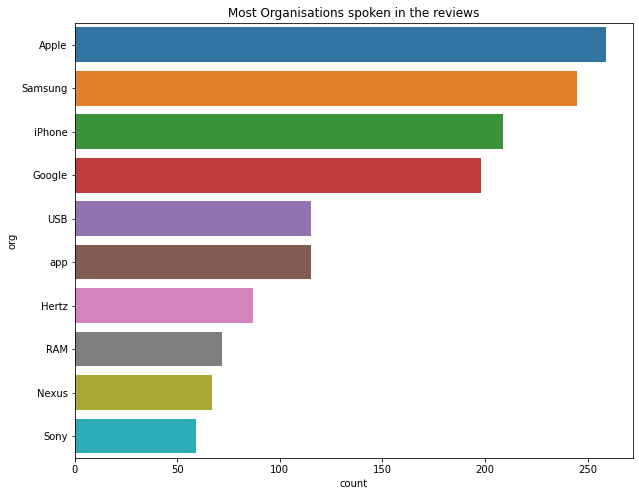

In [120]:
plt.figure(figsize=(10,8))
plt.title("Most Organisations spoken in the reviews")
sns.barplot(x="count", y="org", data=orgdfTop10)

In [194]:
def cleanwithSpacy(text):
    for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t¦¡§':
        text = text.replace(char, '')
    text = text.lower()
    doc = nlp(text)
    words = ''
    for token in doc:
        if(token.is_stop == False):
            words = words + ' ' + token.text
    return words

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [195]:
df2 = df
for i in df2.index:
    df2.at[i,'textWithoutStop'] = cleanwithSpacy(df2.iloc[i]['text'])

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [196]:
df2.head()

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,videoId,title,length,text,Product,Price,Prices,textWithoutStop
0,s8Un0XB_8xk,OnePlus 2 Review!,13:59,"Hey, what is up guys? Um could be HD here, and...",OnePlus 2,2 2 1 2 1 2 three 2 5.5 one one 2 one two one...,"800,389",hey guys um hd oneplus 2 company named oneplu...
1,LObJOc5u7sY,Jaybird X2 Review: Best Bluetooth Earbuds!,4:21,"Hey, what's up guys, I'm Kim PhD here, and the...",Jaybird X2 Best Bluetooth Earbuds,2 200 5 $ 200 three three 2 2015 2 three thre...,"200 bucks,200,150 bucks",hey s guys m kim phd jbird 2s bluetooth ear...
2,9HDKRP4nzc0,Moto G 2015 Review!,5:32,"Hey what is up guys in qHD here? Alright, we h...",Moto G 2015,2 400 300 3 2 2015 two 179 $ 179 8 1 $ 220 16...,"400 bucks,300 bucks,$ 179,220,a little over $ ...",hey guys qhd alright pretty great smartphones...
3,cx20nTPZjes,Sony RX100 IV Review: Pocket 4K!,7:10,"Hey what is up guys? I'M could be HD here, and...",Sony RX100 IV Pocket 4 K,two 3 4 2 3 4 3 one 21 24 70 30 mm 960 one 4k...,"rx100 mark,rx100 mark,a thousand dollar,a thou...",hey guys m hd sequel best pocket camera years...
4,xpc07Lbgrow,GoPro Hero 4 Session Review!,6:35,"Hey what is up guys, I'm Kim PhD here and ever...",GoPro Hero 4 Session,one 2015 $ 99 one two one one two one one 50 ...,"99,400 bucks,500 bucks,400 bucks,400",hey guys m kim phd single gopro way 2015 rect...


In [197]:
cou_vec = CountVectorizer(stop_words='english', max_df = 0.85, min_df =5)
tfidf = cou_vec.fit_transform(df2['textWithoutStop'])

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [198]:
lda_model = LDA(n_components=3, random_state = 42)
lda_fit = lda_model.fit(tfidf)
terms = cou_vec.get_feature_names()
topicList_lda = []
for i, comp in enumerate(lda_model.components_):
    #print(f"The topic would be {id_value}")
    lda = [terms[index] for index in comp.argsort()[:10]]
    #print(lis)
    topicList_lda.append(lda)
results = lda_model.transform(tfidf)

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [199]:
topicList_lda

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['mics',
  'earbuds',
  'earbud',
  'threes',
  'workout',
  'wire',
  'ears',
  'cups',
  'smoothing',
  'jaybird'],
 ['smoothing',
  'nexuses',
  'turbo',
  'ridged',
  'warp',
  'grill',
  'blind',
  's8',
  'lumia',
  'pillars'],
 ['m50',
  'tegra',
  'website',
  'transformer',
  'books',
  'em',
  'effective',
  'bang',
  'cups',
  'buck']]

In [190]:
lsi_model = TruncatedSVD(n_components=3, random_state = 42)
lsi_fit = lsi_model.fit(tfidf)
terms = cou_vec.get_feature_names()
topicList_lsi= []
for i, comp in enumerate(lsi_model.components_):
    #print(f"The topic would be {id_value}")
    lsi = [terms[index] for index in comp.argsort()[:5]]
    #print(lis)
    topicList_lsi.append(lsi)
results_lsi= lsi_model.transform(tfidf)

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
topicList_lsi

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['intel', 'air', 'asus', 'mark', 'safari'],
 ['galaxy', 's6', 's3', 's4', 'samsung'],
 ['nexus', 'google', 'edition', 's4', 's3']]

In [200]:
import pyLDAvis
import json

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [201]:
import pyLDAvis.sklearn
data = pyLDAvis.sklearn.prepare(lda_model, tfidf, cou_vec)

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [203]:
pyLDAvis.display(data)

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
import json
pyLDAvis.save_html(data, 'output_filename.html')

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
